In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('sample_kmeans.xlsx')
data

,X,Y
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72
5,188,77
6,180,75
7,175,70
8,165,65


In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)
data

,X,Y,clusters
0,185,72,0
1,170,56,1
2,168,60,1
3,179,68,0
4,182,72,0
5,188,77,0
6,180,75,0
7,175,70,0
8,165,65,1


In [5]:
data[data['clusters']==0].count()

X           6
Y           6
clusters    6
dtype: int64

In [6]:
data[data['clusters']==1].count()

X           3
Y           3
clusters    3
dtype: int64

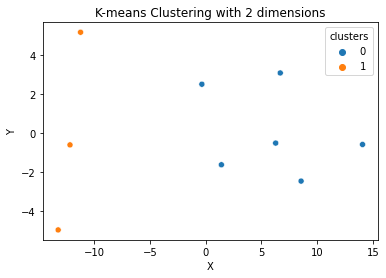

In [8]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

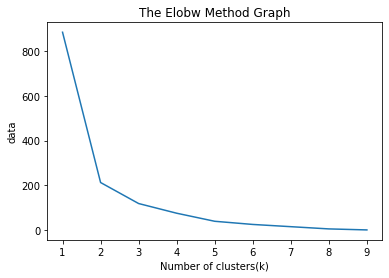

In [11]:
wcss_list= [] 
for i in range(1, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(data)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 10), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('data')  
plt.show()  